# Preprocessing

Import Library

In [ ]:
pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import joblib
import emoji
import random
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# menetapkan random supaya hasil tidak acak
random.seed(42)
np.random.seed(42)

Load Data

In [ ]:
# Membaca file dengan nama spesifik
df = pd.read_csv("data.csv")
df

,Ulasan
0,bahan botol tipis. setauku pet 1 hanya diguna...
1,"Materialnya bagus, tahan lama, ga gampang rusa..."
2,packing aman ya dan botol ada plastik pembungk...
3,kualitas top. model easy grip sangat OK. packi...
4,Kaget pas datang paketnya dalam dus gede bange...
...,...
3084,"barang oke bgt, pengiriman cepat dan dapet pas..."
3085,"Material nya bagus. Kalailu lock n Lock, jamin..."
3086,barang nya bagus...packing nya rapi dan aman.....
3087,"Tutupnya bermasalah, nggak bisa kenceng. Kalau..."


In [ ]:
# Menampilkan data duplikat
df[df.duplicated()]

,Ulasan


- Ganti kata slang dengan kata baku
- hapus Kata tidak relevan
- Mengubah huruf menjadi huruf kecil
- hapus angka
- hapus tanda baca
- cleaning data

In [ ]:
# Kamus penggantian kata-kata slang menjadi baku dan penggantian kata bahsa inggris menjadi indonesia
custom_dict = {
    'mantap': ['mantep', 'mantab', 'mantaab'],
    'bagus' : ['good', 'top'],
    'tidak': ['ga', 'gak', 'nggak'],
    'oke' : ['ok'],
    'mudah': ['easy'],
    'besar': ['gede'],
    'kukuh': ['kokoh'],
    'senang' :['happy'],
    'saran' : ['rekomen', 'Recommended'],
    'pas' : ['sesuai'],
    'sepadan' :['worth it'],
    'terlambat' : ['telat'],
    'kotor' : ['jorok'],
    'menunda' :['delay'],
    'melentur' : ['melenyot'],
    'membungkus' : ['paking', 'pacing'],
    'tempat' : ['lapak'],
    'kualitas' : ['kwalitas'],
    'selotip' : ['lakban'],
    'penjualan kilat' :['flashsale'],
    'membangun' : ['branding'],
    'produk' : ['product'],
    'desain' : ['design'],
    'tubuh' : ['body'],
    'sampai' :['sampe'],
    'kemarin' : ['kemaren'],
    'pengiriman' : ['delivery'],
    'pengaruh' : ['ngaruh'],
    'terimakasih' : ['thanks', 'tx', 'makasiiih', 'thankyu'],
    'cepat' : ['fast'],
    'tersenggol' : ['kesenggol'],
    'melayani' :['service'],
    'ringan' : ['enteng'],
    'anggun' : ['elegant'],
    'plastik': ['plastic'],
    'sealed' :['tertutup'],
    'atau' : ['ato'],
    'tekan' : ['pencet'],
    'rapi' : ['rapih'],
    'tetap bersih' : ['stay clean'],
    'penjual' : ['seller'],
    'terbaik' : ['the best'],
    'pengiriman' :['shipping'],
    'dengan' : ['dg', 'dgn'],
    'bahan' : ['bhn'],
    'fungsional' : ['functionall'],
    'diamankan' : ['secured'],
    'keseluruhan' : ['overall'],
    'memesan' : ['order'],
    'bungkus gelembung' : ['bumble wrap'],
    'tetapi' : ['tapi'],
    'menarik' : ['cakep'],
    'kuat' : ['paten'],
    'tes' : ['test'],
    'tiba' : ['arrive'],
    'banget' : ['bngt'],
    'responsif' : ['respinsif'],
    'merek' : ['merk'],
    'kalau' : ['klo'],
    'pakai' : ['pake'],
    'bohong' : ['boong'],
    'dapet' : ['dapet'],
    'mengulas' :['ulas'],
    'mempengaruhi' : ['ngaruhin'],
    'seperti' : ['kayak'],
    'malam': ['malem'],
    'minum' : ['mnum'],
    'lucu' : ['cuteeeeee'],
    'tolong' :['tlg'],
    'kartu posnya' : ['postcardnya'],
    'pesen' : ['persen'],
    'diberi' : ['di pakein'],
    'belanja' : ['blnja'],
    'mentraktir' : ['tlaktirannya'],
    'botol' : ['botle'],
    'selalu' : ['sllu'],
    'material' : ['maaterial'],
    'kesal' : ['kesel'],
    'menuggu' : ['nunggu'],
    'mengincar' : ['ngincer'],
    'tetapi' : ['tapiiiii'],
    'selamat' : ['selamatttt']
}

In [ ]:

# Daftar kata-kata tidak relevan yang ingin dihapus
irrelevant_words = ['yang', 'barang', 'nya', 'botol', 'air', 'ini', 'itu']

# Persiapan stopwords
stop_words = set(stopwords.words('indonesian'))


def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')  # Menghapus semua emoji

# Fungsi untuk membersihkan teks dan mengganti kata slang menjadi baku
def clean_text(text):
    text = text.lower()  # Lowercase semua teks
    text = remove_emoji(text)  # Hapus emoji di sini
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca

    # Gantikan kata slang dengan kata baku berdasarkan custom_dict
    for key, replacements in custom_dict.items():
        for word in replacements:
            # Gunakan regex untuk memastikan penggantian hanya dilakukan pada kata yang terpisah
            text = re.sub(r'\b' + re.escape(word) + r'\b', key, text)

    tokens = word_tokenize(text)  # Tokenisasi teks
    tokens = [word for word in tokens if word not in stop_words]  # Menghapus stopwords
    tokens = [word for word in tokens if word not in irrelevant_words]  # Menghapus kata irrelevan
    tokens = list(dict.fromkeys(tokens))  # Menghapus duplikasi dengan mengubah ke set dan kembali ke list
    return ' '.join(tokens)  # Gabungkan kembali token menjadi kalimat



# Terapkan fungsi untuk membersihkan teks di kolom 'Ulasan'
df['Cleaned'] = df['Ulasan'].apply(clean_text)

In [ ]:
# Menampilkan hasil ulasan dan cleaned
df[['Ulasan', 'Cleaned']]

,Ulasan,Cleaned
0,bahan botol tipis. setauku pet 1 hanya diguna...,bahan tipis setauku pet pakai tp yg beda
1,"Materialnya bagus, tahan lama, ga gampang rusa...",materialnya bagus tahan gampang rusak awet
2,packing aman ya dan botol ada plastik pembungk...,packing aman ya plastik pembungkusnya tdk gore...
3,kualitas top. model easy grip sangat OK. packi...,kualitas bagus model mudah grip oke packing su...
4,Kaget pas datang paketnya dalam dus gede bange...,kaget pas paketnya dus banget aman pokoknya la...
...,...,...
3084,"barang oke bgt, pengiriman cepat dan dapet pas...",oke bgt pengiriman cepat dapet pas diskon
3085,"Material nya bagus. Kalailu lock n Lock, jamin...",material bagus kalailu lock n jaminan mutu ter...
3086,barang nya bagus...packing nya rapi dan aman.....,baguspacking rapi amanpuas belanja
3087,"Tutupnya bermasalah, nggak bisa kenceng. Kalau...",tutupnya bermasalah kenceng miring airnya lang...


Bersihkan Duplikat

In [ ]:
# Menampilkan data duplikat di data cleaned
duplikat = df['Cleaned'][df['Cleaned'].duplicated()]
duplikat

,Cleaned
200,material produk bagus kualitas warna pas ukuran
221,material produk bagus kualitas ukuran pas warna
236,material produk bagus kualitas warna pas ukuran
266,material produk bagus kualitas warna pas ukuran
305,material produk bagus warna pas kualitas ukuran
343,material produk bagus kualitas
405,material produk bagus warna pas kualitas
523,kualitas produk bagus material ukuran pas warna
607,lock mah jaminan mutu kualitasnya yg bikin sen...
740,material produk bagus warna pas


In [ ]:
# Menghapus duplikat berdasarkan kolom 'Cleaned'
df = df.drop_duplicates(subset='Cleaned', keep='first').reset_index(drop=True)

# Menampilkan hasil sesudah duplikat dihapus
df['Cleaned']

,Cleaned
0,bahan tipis setauku pet pakai tp yg beda
1,materialnya bagus tahan gampang rusak awet
2,packing aman ya plastik pembungkusnya tdk gore...
3,kualitas bagus model mudah grip oke packing su...
4,kaget pas paketnya dus banget aman pokoknya la...
...,...
3044,oke bgt pengiriman cepat dapet pas diskon
3045,material bagus kalailu lock n jaminan mutu ter...
3046,baguspacking rapi amanpuas belanja
3047,tutupnya bermasalah kenceng miring airnya lang...


# Labeling

Labeling Lexicon
- Positif > Negatif : Kelas Positif
- Positif < Negatif : Kelas Negatif
- Positif = Negatif : Kelas Netral

In [ ]:
# Load lexicon
df_positif = pd.read_csv("positif.csv", sep=";")
df_positif

,word,weight
0,hai,3
1,merekam,2
2,ekstensif,3
3,paripurna,1
4,detail,2
...,...,...
3604,melarikan,3
3605,vakansi,3
3606,spesial,4
3607,asrama,3


In [ ]:
df_negatif = pd.read_csv("negatif.csv", sep=";")
df_negatif

,word,weight
0,putus tali gantung,-2
1,gelebah,-2
2,gobar hati,-2
3,tersentuh (perasaan),-1
4,isak,-5
...,...,...
6604,kantong kering,-4
6605,penggaruk,-3
6606,senewen,-4
6607,menetapkan,-5


In [ ]:
# Normalisasi kolom dan tipe data
df_positif.columns = df_positif.columns.str.strip().str.lower()
df_negatif.columns = df_negatif.columns.str.strip().str.lower()

df_positif['weight'] = df_positif['weight'].astype(int)
df_negatif['weight'] = df_negatif['weight'].astype(int)

# Gabungkan ke dictionary, tanpa menimpa nilai positif jika ada duplikat
lexicon_dict = {}

# Tambahkan kata dari lexicon positif
for _, row in df_positif.iterrows():
    lexicon_dict[row['word']] = row['weight']

# Tambahkan kata dari lexicon negatif jika belum ada di positif
for _, row in df_negatif.iterrows():
    if row['word'] not in lexicon_dict:
        lexicon_dict[row['word']] = -abs(row['weight'])

# Tambahkan frasa penting (bigram) secara manual
phrase_lexicon = {
    "tidak tahu": -2,
    "tidak suka": -2,
    "sangat puas": 2,
    "kurang baik": -2,
    "tidak puas": -2,
    "sangat baik": 2,
    "kurang suka": -2
}

# Fungsi evaluasi sentimen dengan debug + frasa
def assign_sentiment_score_debug(text):
    text = text.lower()
    score = 0
    details = []

    # Deteksi frasa terlebih dahulu
    for phrase, weight in phrase_lexicon.items():
        if phrase in text:
            score += weight
            details.append((phrase, weight))
            text = text.replace(phrase, "")  # Hapus agar tidak dihitung ulang

    # Tokenisasi kata satuan
    tokens = text.split()
    for token in tokens:
        weight = lexicon_dict.get(token)
        if weight is not None:
            score += weight
            details.append((token, weight))

    # Debug print
    print(f"\nKalimat: {text}")
    print(f"Token/frasa ditemukan: {details}")
    print(f"Skor akhir: {score}")

    # Klasifikasi akhir
    if score > 0:
        return "Positif"
    elif score < 0:
        return "Negatif"
    else:
        return "Netral"

In [ ]:
# Terapkan fungsi scoring ke kolom cleaned
df['Label'] = df['Cleaned'].apply(assign_sentiment_score_debug)


Kalimat: bahan tipis setauku pet pakai tp yg beda
Token/frasa ditemukan: [('bahan', -3), ('beda', -2)]
Skor akhir: -5

Kalimat: materialnya bagus tahan gampang rusak awet
Token/frasa ditemukan: [('bagus', 2), ('tahan', 1), ('gampang', 4), ('rusak', 3), ('awet', 4)]
Skor akhir: 14

Kalimat: packing aman ya plastik pembungkusnya tdk goresan dilapisi bubble wrap produk stock
Token/frasa ditemukan: [('ya', 4), ('produk', 3)]
Skor akhir: 7

Kalimat: kualitas bagus model mudah grip oke packing super pas promo murah
Token/frasa ditemukan: [('kualitas', 4), ('bagus', 2), ('model', 3), ('mudah', 4), ('grip', -4), ('oke', 2), ('super', 3), ('pas', 3), ('promo', 3), ('murah', 3)]
Skor akhir: 23

Kalimat: kaget pas paketnya dus banget aman pokoknya lapis bubble wrap tebel otw cek out warna selagi harga diskon
Token/frasa ditemukan: [('kaget', 3), ('pas', 3), ('banget', 1), ('pokoknya', -3), ('cek', -4), ('selagi', -2), ('harga', 3), ('diskon', 2)]
Skor akhir: 3

Kalimat: tokped disuruh konsumptif

In [ ]:
# Baru tampilkan hasil
df[['Cleaned', 'Label']]

,Cleaned,Label
0,bahan tipis setauku pet pakai tp yg beda,Negatif
1,materialnya bagus tahan gampang rusak awet,Positif
2,packing aman ya plastik pembungkusnya tdk gore...,Positif
3,kualitas bagus model mudah grip oke packing su...,Positif
4,kaget pas paketnya dus banget aman pokoknya la...,Positif
...,...,...
3044,oke bgt pengiriman cepat dapet pas diskon,Positif
3045,material bagus kalailu lock n jaminan mutu ter...,Positif
3046,baguspacking rapi amanpuas belanja,Positif
3047,tutupnya bermasalah kenceng miring airnya lang...,Negatif


In [ ]:
positif_data = df[df['Label'] == 'Positif'][['Cleaned', 'Label']]
positif_data

,Cleaned,Label
1,materialnya bagus tahan gampang rusak awet,Positif
2,packing aman ya plastik pembungkusnya tdk gore...,Positif
3,kualitas bagus model mudah grip oke packing su...,Positif
4,kaget pas paketnya dus banget aman pokoknya la...,Positif
5,tokped disuruh konsumptif ngasih case back per...,Positif
...,...,...
3042,material produk bagus ukuran pas,Positif
3043,produk pas gambar designnya menarik tutup erat...,Positif
3044,oke bgt pengiriman cepat dapet pas diskon,Positif
3045,material bagus kalailu lock n jaminan mutu ter...,Positif


In [ ]:
# Menampilkan hanya kolom 'Cleaned' dan 'Label' untuk kelas negatif
negatif_data = df[df['Label'] == 'Negatif'][['Cleaned', 'Label']]
negatif_data

,Cleaned,Label
0,bahan tipis setauku pet pakai tp yg beda,Negatif
17,minum jenis pet dipamai,Negatif
19,bagus bening ukuran bagusss warna cakepppp mantul,Negatif
21,mantap container water bottle pembelian ketiga...,Negatif
34,penjual responsif packaging rapi bubble wrap k...,Negatif
...,...,...
2974,oke cantik pas gbr tutupnya karet tutup atasny...,Negatif
3025,salah treatment kena panas langsung bengkok,Negatif
3028,bocor diluar ekspektasi merek locknlock,Negatif
3029,bingung produk tutup kode pet aman pakai berul...,Negatif


In [ ]:
# Menampilkan hanya kolom 'Cleaned' dan 'Label' untuk kelas Positif
netral_data = df[df['Label'] == 'Netral'][['Cleaned', 'Label']]
netral_data

,Cleaned,Label
11,produk pesanan pas pengiriman standard dipake ...,Netral
50,barangnya diterima kondisi kardus pengiriman p...,Netral
102,baguspacking aman bubble wrap plastik tebal,Netral
132,kirain merek lock and bagus plastiknya pet,Netral
144,beli kalinya beda tumbler cuci bersih dasar,Netral
...,...,...
2981,tutupnya pecah not recommended,Netral
2994,selamat packing aman lapisi bubble wrap kardus...,Netral
2998,mantaap persediaan minum dingiin,Netral
3036,puas bgt barangnya bagus tebal pengiriman supe...,Netral


In [ ]:
# Jumlah Distribusi Sentimen
# Menghitung jumlah masing-masing label
label_counts = df['Label'].value_counts()
label_counts

,count
Label,
Positif,2579
Negatif,329
Netral,141


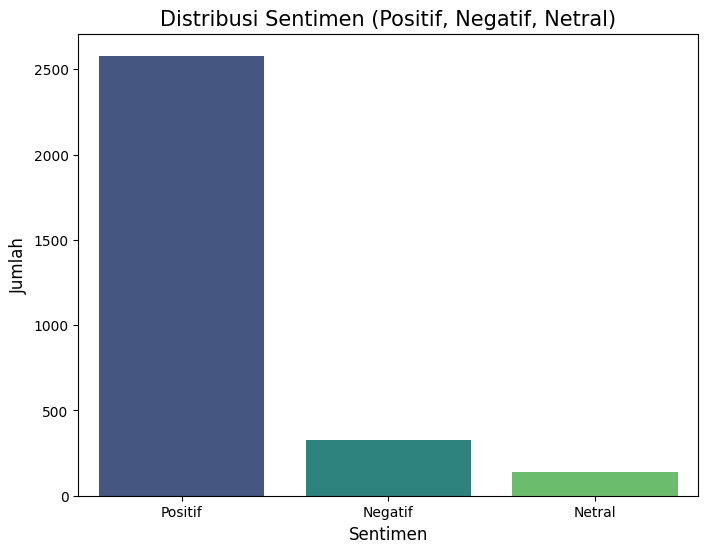

In [ ]:
# Membuat bar plot untuk distribusi sentimen
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis', hue=label_counts.index, dodge=False)  # Set hue and dodge

# Menambahkan judul dan label
plt.title('Distribusi Sentimen (Positif, Negatif, Netral)', fontsize=15)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend([],[],frameon=False) # Remove the legend

# Menampilkan plot
plt.show()

Visualisasi Word Cloud

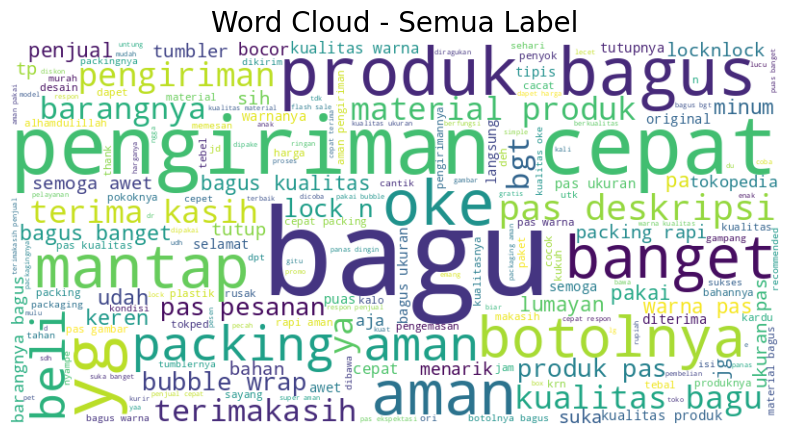

In [ ]:
all_text = ' '.join(df['Cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Semua Label', fontsize=20)
plt.axis('off')
plt.show()

# Ekstraksi Fitur

Pisah variabel X dan y

In [ ]:
# Menyusun X dan y
X = df['Cleaned']  # Fitur dari kolom 'Cleaned'
y = df['Label']  # Target dari kolom 'Label'

In [ ]:
# Menggunakan TfidfVectorizer untuk ekstraksi fitur
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
# Visualisasi TF-IDF
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Gabungkan dengan label
df_tfidf = pd.concat([X_tfidf_df, y], axis=1)

# Tampilkan hasilnya
df_tfidf

,aa,aaaa,aaaaa,aaaaaa,aaaaaaaa,aaaaah,aamiin,aawet,abaikan,abang,...,you,youu,youuu,youuuuu,yuhuuuu,yuk,zonk,zoro,zorro,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positif
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positif
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positif
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positif
3045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positif
3046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positif
3047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif


SMOTE Oversampling untuk mengatasi data yang tidak seimbang

In [ ]:
# Terapkan SMOTE untuk oversampling setelah TF-IDF
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

In [ ]:
# Cek distribusi label setelah SMOTE
# Menghitung jumlah masing-masing label setelah SMOTE
label_counts_smote = pd.Series(y_smote).value_counts()
label_counts_smote

,count
Label,
Negatif,2579
Positif,2579
Netral,2579


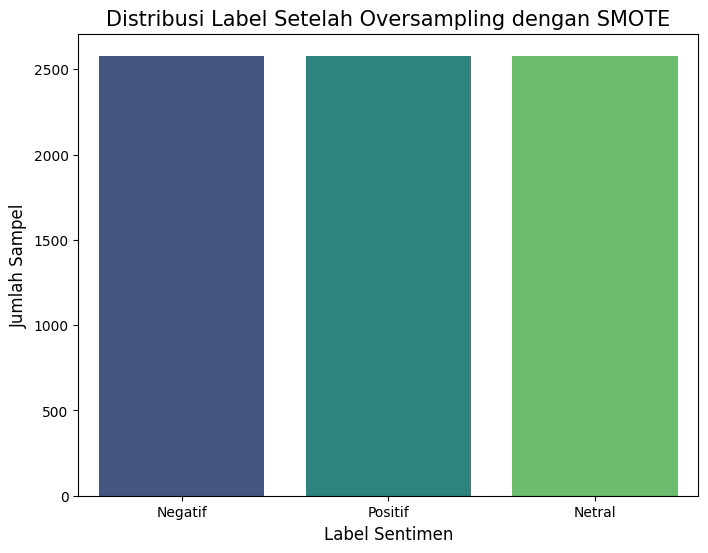

In [ ]:
# Membuat bar plot untuk distribusi label setelah oversampling
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts_smote.index, y=label_counts_smote.values, palette='viridis', hue=label_counts_smote.index, dodge=False)

# Menambahkan judul dan label
plt.title('Distribusi Label Setelah Oversampling dengan SMOTE', fontsize=15)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.legend([],[],frameon=False) # Remove the legend

# Menampilkan plot
plt.show()

In [ ]:
# Label Encoding untuk y_resampled
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_smote)

In [ ]:
# Buat DataFrame mapping label ke angka
label_mapping_df = pd.DataFrame({
    'Label': encoder.classes_,
    'Encoding': range(len(encoder.classes_))
})

# Tampilkan
label_mapping_df

,Label,Encoding
0,Negatif,0
1,Netral,1
2,Positif,2


In [ ]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_encoded, random_state=42, stratify=y_encoded)

# Modeling

In [ ]:
model = MLPClassifier(random_state=42)
model.fit(X_train, y_train)

MLPClassifier(random_state=42)

# Evaluation

In [ ]:
# Prediksi Neural Network pada data uji
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi model Neural Network
print("\n=== Evaluasi Model ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== Evaluasi Model ===
Confusion Matrix:
 [[645   0   0]
 [  0 645   0]
 [ 17  18 610]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       645
           1       0.97      1.00      0.99       645
           2       1.00      0.95      0.97       645

    accuracy                           0.98      1935
   macro avg       0.98      0.98      0.98      1935
weighted avg       0.98      0.98      0.98      1935



In [ ]:
joblib.dump(model, 'model.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')